In [76]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import math
import scipy.integrate
import pandas as pd
import seaborn as sb
import surfaces_and_fields.system_cylinder as cylinder
import os
import matplotlib

firsttime=False

plt.rcParams["figure.figsize"]=10,10
plt.rcParams['font.size'] = '24'

In [46]:
#getting area for a certain k
def area(k,a): 
    cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
    return cy.evaluate_A_integral_0(amplitude=a)
area(1,.5)

6.2403678989376985

In [47]:
#getting (A-A_0)^2 or |A-A_0| instead
def area_diff_squared(k,a, A0factor, cy=None, basearea=None):
    if cy is None:
        cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
    if basearea is None:
        basearea = cy.evaluate_A_integral_0(amplitude=0)
    return (cy.evaluate_A_integral_0(amplitude=a)-A0factor*basearea)**2

def area_diff(k,a, A0factor, cy=None, basearea=None):
    if cy is None:
        cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
    if basearea is None:
        basearea = cy.evaluate_A_integral_0(amplitude=0)
    return cy.evaluate_A_integral_0(amplitude=a)-A0factor*basearea

print(area_diff_squared(1,0,1),
      area_diff_squared(1,.5,1),
      area_diff(1,0,1),
      area_diff(1,.5,1))

0.0 0.0018333304485524755 0.0 -0.04281740824188773


In [48]:
def detect_zeros(list_tuples):
    signs = [np.sign(x[0]) for x in list_tuples]
    sign = signs[0]
    if list_tuples[0][0]==0:
        sign=signs[1]
    signchanges=[]
    for index, s in enumerate(signs):
        if s != sign:
            signchanges.append(list_tuples[index])
            sign = s
    return signchanges

In [49]:
#visualize area(k)
astep=.01
kstep=.01
a_s = np.arange(0, 1, astep)
ks = np.arange(0.1, 2, kstep)
minima=[]
minenergies={}
areafactor=1.01

Es={}
for k in ks:
    Es[k]={}
    #!mind the import:
    #this is the cylinder_freevolume object, which does not adjust r_0 to a value r(a)
    # which conserves volume
    cy=cylinder_freevolume.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
    basearea= cy.evaluate_A_integral_0(amplitude=0)
    for a in a_s:
        Es[k][a]=area_diff(k,a,areafactor, cy, basearea)


In [54]:
def equal_area_ks(areafactor, a_s):
    minima=[]
    Es={}
    for k in ks:
        Es[k]={}
        #!mind the import:
        #this is the cylinder_freevolume object, which does not adjust r_0 to a value r(a)
        # which conserves volume
        cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=1, gamma=1, intrinsic_curvature=0)
        basearea= cy.evaluate_A_integral_0(amplitude=0)
        for a in a_s:
            Es[k][a]=area_diff(k,a,areafactor, cy, basearea)
    for k in ks:
        #plt.plot(Es[k].keys(), Es[k].values(), label=str(round(k,3)))
        l = list(zip(Es[k].values(), Es[k].keys()))
        min_=detect_zeros(l)
        for (E,a) in min_:
            minima.append((k,abs(a)))
    #print(minima)
    outk_s = [m[0] for m in minima]
    outa_s = [m[1] for m in minima]
    #plt.legend()
    #plt.ylim((0,1))
    #plt.ylabel("Area")
    #plt.xlabel("|a|")
    #this is a line A(a) for each k
    return outa_s, outk_s


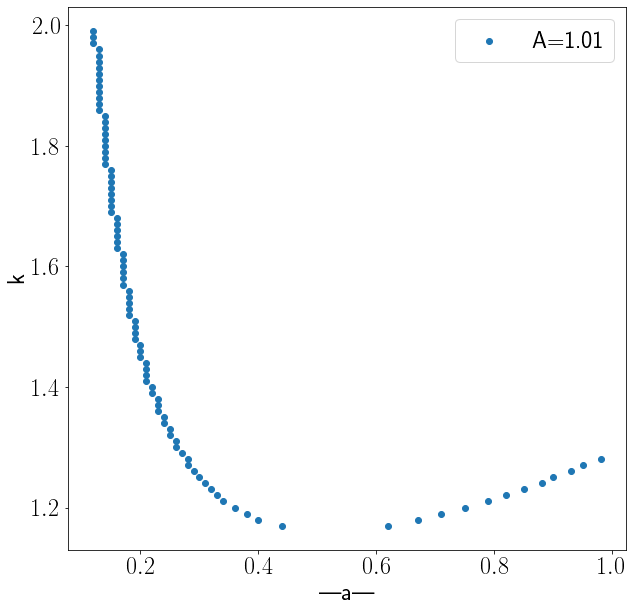

In [56]:
A0a_s, A0k_s = equal_area_ks(areafactor, a_s)
plt.scatter(A0a_s, A0k_s, label="A="+str(round(areafactor,2)))
plt.ylabel('k')
plt.xlabel('|a|')
plt.legend()

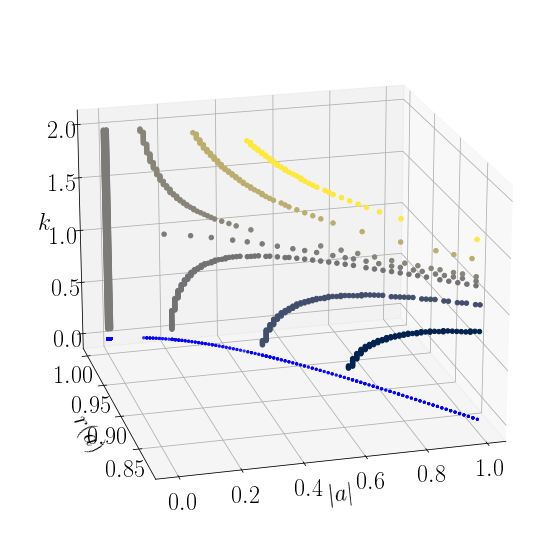

In [100]:
# try to make this 3D

def radius_rescaled(a, radius=1):
    return radius/math.sqrt(1+a**2/2)

fig = plt.figure()
ax = plt.axes(projection='3d')


if firsttime:
    A0a_s_dict = {}
    A0k_s_dict = {}
    for areafactor in [.9, .95, .99, 1, 1.01, 1.05, 1.1]:
        A0a_s, A0k_s = equal_area_ks(areafactor, a_s)
        A0a_s_dict[areafactor]=A0a_s
        A0k_s_dict[areafactor]=A0k_s

for areafactor in [.9, .95, .99, 1, 1.01, 1.05, 1.1]:
    A0a_s = A0a_s_dict[areafactor]
    A0k_s = A0k_s_dict[areafactor]
    radii = [radius_rescaled(a) for a in A0a_s]
    ax.scatter(A0a_s, radii, A0k_s,color=colors[areafactor], alpha=1)
    ax.scatter(A0a_s, radii, zs=0, zdir='z', label='r(a)', color='blue', marker='.')

ax.set_zlabel(r'$k$')
ax.set_ylabel(r'$r(a)$')
ax.set_xlabel(r'$|a|$')
ax.view_init(elev=20., azim=-105)
#plt.savefig("equalarea_3D_tmp.png")

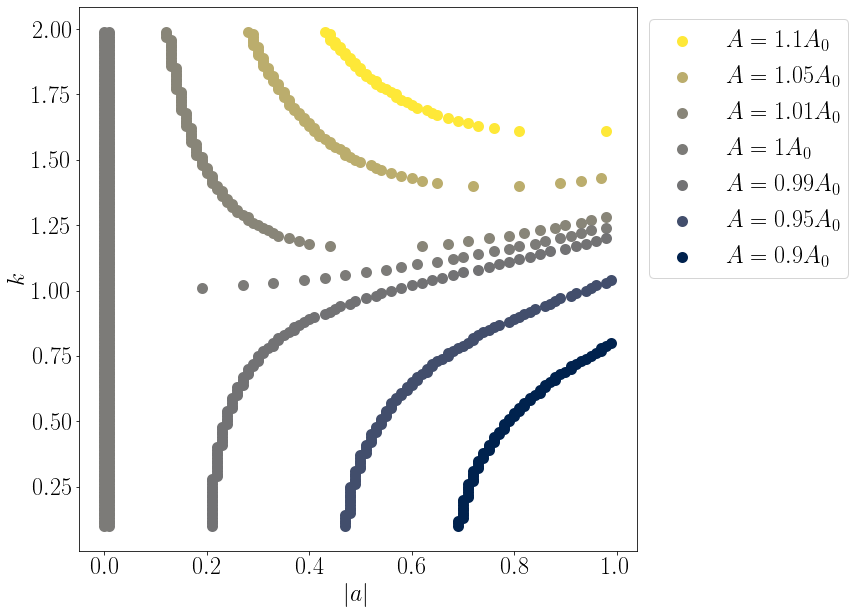

In [96]:
#maybe it's easier to just col
#or code by r(a)?

for i in A0a_s_dict:
    value = (i-min(A0a_s_dict))/(max(A0a_s_dict)-min(A0a_s_dict))
    colors[i] = matplotlib.cm.cividis(value)

for areafactor in [.9, .95, .99, 1, 1.01, 1.05, 1.1][::-1]:
    A0a_s=A0a_s_dict[areafactor]
    A0k_s = A0k_s_dict[areafactor]
    radii = [radius_rescaled(a) for a in A0a_s]
    plt.scatter(A0a_s, A0k_s, label=r'$A='+str(areafactor)+' A_0$', 
             color=colors[areafactor], linewidth=5)

plt.ylabel(r'$k$')
plt.xlabel(r'$|a|$')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
#plt.savefig("equalarea_tmp.png", bbox_inches = 'tight')

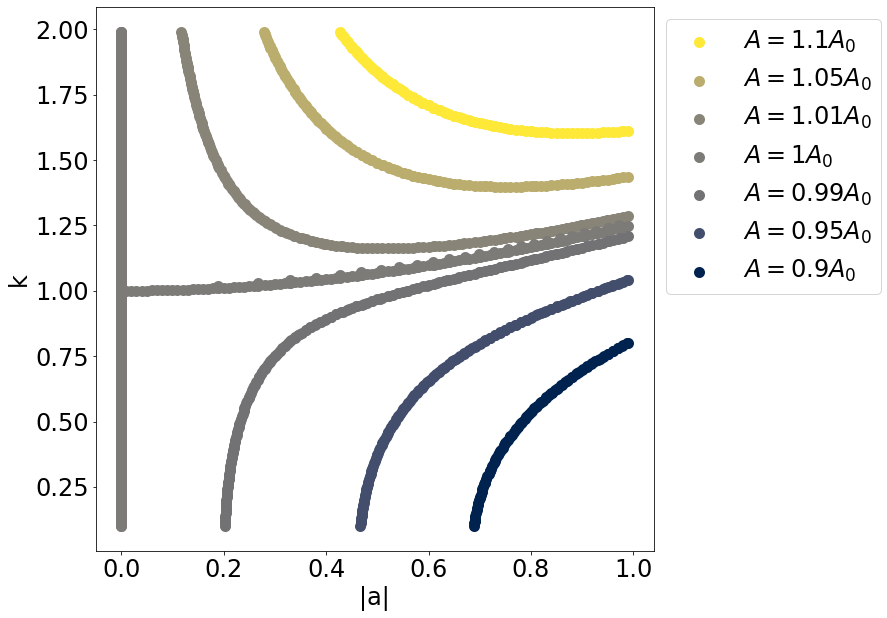

In [661]:
colors={}
for i in minima:
    value = (i-min(minima))/(max(minima)-min(minima))
    colors[i] = matplotlib.cm.cividis(value)
for areafactor in sorted(minima.keys())[::-1]:
    minima[areafactor].sort(key=lambda x: x[1])
    plt.scatter([x[1] for x in minima[areafactor]], [x[0] for x in minima[areafactor]], label=r'$A='+str(areafactor)+' A_0$', 
             color=colors[areafactor], linewidth=5)
#plt.plot([0,0], [.1, 2.0], label=areafactor, 
#             color=colors[1], linewidth=5)
#plt.plot([0,minima[1][0][1]], [1 ,minima[1][0][0]], label=areafactor, 
#             color=colors[1], linewidth=5)
plt.ylabel("k")
plt.xlabel("|a|")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig("constrained_tmp.png", bbox_inches = 'tight')

In [188]:
# generated a sufficient approximate (k,a) value pairs for each A_0
# now get bending rigidity, intrinsic curvature values for each

In [283]:
def curvenergy(k,a,H0=0, kappa=1, cy=None):
    if cy is None:
        cy=cylinder.Cylinder(wavenumber=k, radius=1, kappa=kappa, gamma=1, intrinsic_curvature=H0)
    return cy.calc_bending_energy(amplitude=a)*k/(math.pi*2) #bending energies need to be normalized to per length 2pi

In [666]:
ce={}
for H0 in [-10,-5,-3,-2,-1,0, 1,10]:
    ce[H0]={}
    for areafactor in minima:
        m=minima[areafactor]
        ce[H0][areafactor]=[]
        for (k,a) in m:
            ce[H0][areafactor].append(curvenergy(k,a,H0))

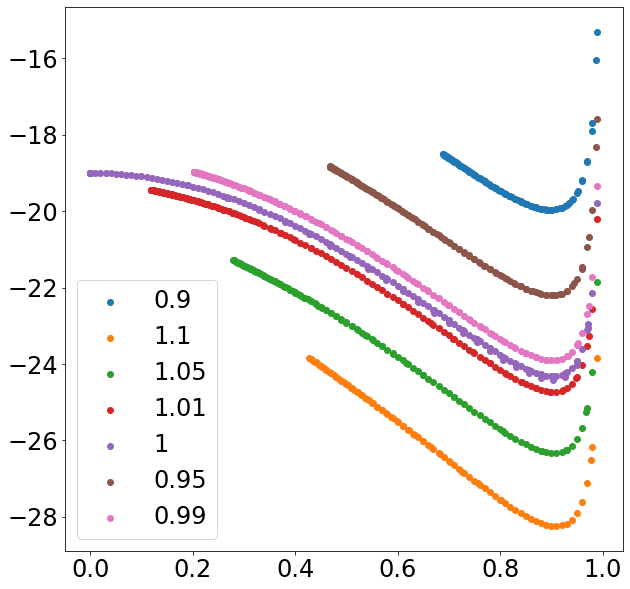

In [669]:
H0=-5
for areafactor in ce[H0]:
    plt.scatter([x[1] for x in minima[areafactor]], ce[H0][areafactor], label=str(areafactor))
plt.legend()

(-0.0495, 1.0395)


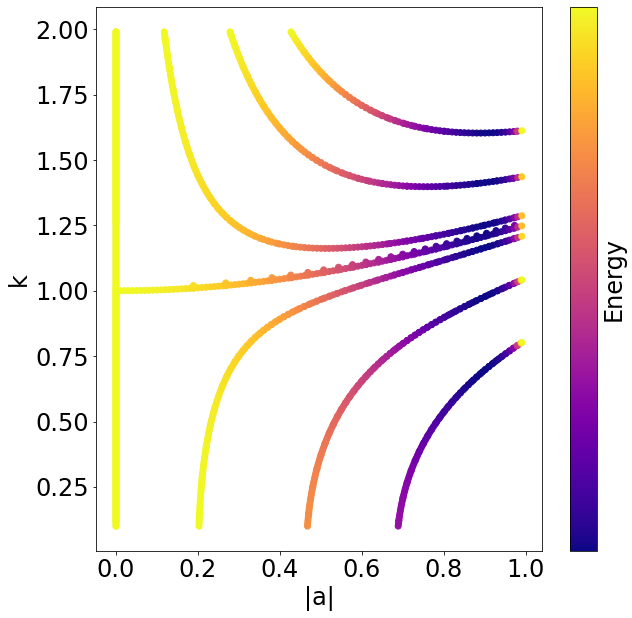

In [673]:
#color coding by bending energy
for areafactor in minima:
    plt.scatter([x[1] for x in minima[areafactor]], [x[0] for x in minima[areafactor]], 
                c=ce[H0][areafactor], cmap='plasma',label=areafactor)
#plt.legend()
plt.colorbar(ticks=[], label = "Energy")
plt.ylabel("k")
plt.xlabel("|a|")
plt.savefig("constrained_H0"+str(H0)+".png")
print(plt.gca().get_xlim())

In [250]:
#add field effect, roughly?

In [251]:
#make a background shading grid of field energy, for n=6 alpha=-4 c=1.5

In [252]:
def sort_csv(filename, dtype=float, fct=(lambda x: abs(x))):
    if dtype==complex:
        dtype = str
        data=pd.read_csv(filename, index_col=0)
        data=data.applymap(complex)
        data=data.applymap(lambda x: fct(x))
    else:
        data=pd.read_csv(filename, index_col=0, dtype=dtype)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    return data


In [293]:
alpha=-4.0
c=1.5
field_energy={} #at specified n, alpha, c
for k in range(12,1, -1):
    field_energy[k/10]={}
    for a in range(0,10):
        dir_="/home/jsk/cylinder/fixed_surfaces/k"+str(k)+"a"+str(a)
        filename = os.path.join(dir_, "field_energy.csv")
        data = sort_csv(filename, dtype=complex)
        field_energy[k/10][a/10]=data.loc[c, alpha]*(k/10)/(2*math.pi)

<AxesSubplot:>

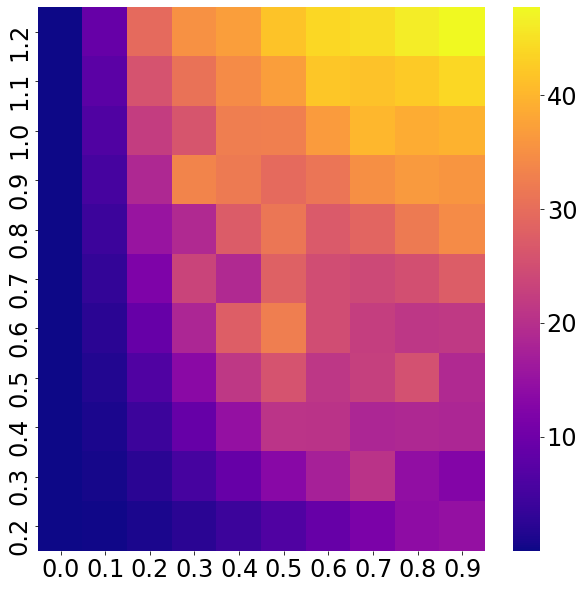

In [649]:
field_energy_df = pd.DataFrame(field_energy)
sb.heatmap(field_energy_df.transpose(), cmap='plasma')

In [296]:
def complex_array_to_rgb(X, theme='dark', rmax=None):
    '''Takes an array of complex number and converts it to an array of [r, g, b],
    where phase gives hue and saturaton/value are given by the absolute value.
    Especially for use with imshow for complex plots.'''
    absmax = rmax or np.abs(X).max()
    Y = np.zeros(X.shape + (3,), dtype='float')
    Y[..., 0] = np.angle(X) / (2 * math.pi) % 1
    if theme == 'light':
        Y[..., 1] = np.clip(np.abs(X) / absmax, 0, 1)
        Y[..., 2] = 1
    elif theme == 'dark':
        Y[..., 1] = 1
        Y[..., 2] = np.clip(np.abs(X) / absmax, 0, 1)
    Y = matplotlib.colors.hsv_to_rgb(Y)
    return Y

def complex_heatmap(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    plt.imshow(complex_array_to_rgb(data, theme, rmax))

def complex_heatmap_2(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    return data.transpose()

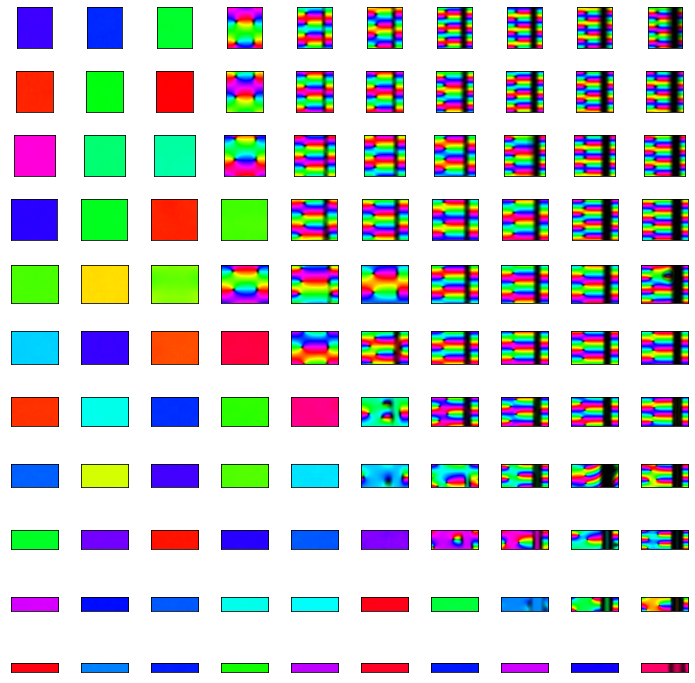

In [301]:
nrows, ncols = field_energy_df.transpose().shape
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=False, figsize=(10,10))

for ax, params in zip(axs.flat, [(k,a) for k in range(12,1, -1) for a in range(10)]):
    k,a= params
    #print(params)
    directory = "/home/jsk/cylinder/fixed_surfaces/k"+str(k)+"a"+str(a)
    try:
        filename=os.path.join(directory, "alpha_"+str(round(alpha,2))+"_C_"+str(round(c,2))+"_snapshot.csv")
        #print(filename)
        heatmap= complex_heatmap_2(filename)
        ax.imshow(complex_array_to_rgb(heatmap, theme='dark', rmax=1))
    except FileNotFoundError:
        pass
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

plt.tight_layout()

In [635]:
#describing the dividing line with k,a pairs
vortex_transition=[(2.5,.35), (.75, .35), (-.05, 1.15)]

In [633]:
#for each (k,a) we need to plot, find field energy of nearest rounded k,a
field_energy_approx={}
for areafactor in minima:
    m=minima[areafactor]
    field_energy_approx[areafactor]=[]
    for (k,a) in m:
        roundk = round(k,1)
        if roundk > 1.2:
            roundk=1.2
        if roundk <.2:
            roundk=.2
        rounda= round(a,1)
        if rounda==1.0:
            rounda=0.9
        field_energy_approx[areafactor].append(field_energy_df.loc[rounda, roundk])

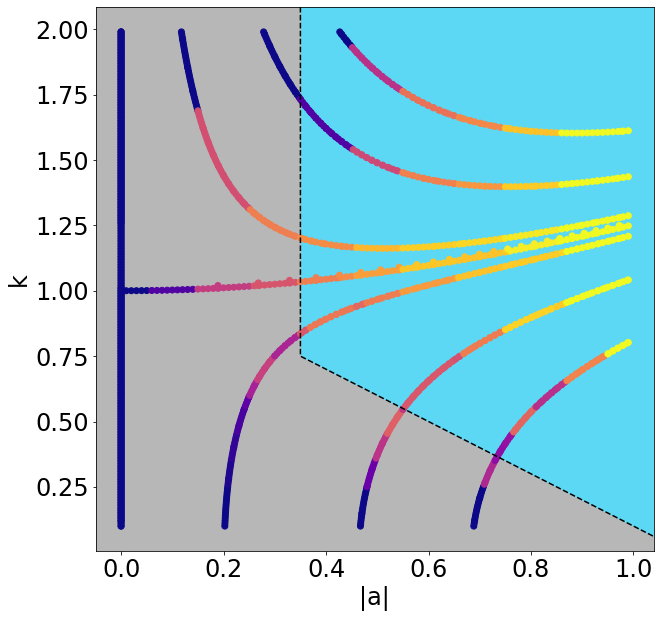

In [648]:
nonvortex='#b7b7b7'
vortex='#5dd8f4'
max_=2.5
min_=-1
plt.plot([x[1] for x in vortex_transition],[x[0] for x in vortex_transition], linestyle='--', color='black')
plt.fill_between([x[1] for x in vortex_transition],min_,[x[0] for x in vortex_transition], color=nonvortex)
plt.fill_between([x[1] for x in vortex_transition],[x[0] for x in vortex_transition],
                 np.max([x[0] for x in vortex_transition]), color=vortex)
plt.fill_between([min_,.35],min_,max_, color=nonvortex)
for areafactor in minima:
    plt.scatter([x[1] for x in minima[areafactor]], [x[0] for x in minima[areafactor]], 
                c=field_energy_approx[areafactor], cmap='plasma',label=areafactor)
plt.savefig("constrained_fieldeffect.png")
plt.ylim((.0055, 2.0845))
plt.xlim((-.0495, 1.0395))
plt.ylabel("k")
plt.xlabel("|a|")
plt.savefig("constrained_fieldeffect.png")